# Benchmark Plot

In [1]:
import ams
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scienceplots

ams.config_logger(stream_level=20)

%run ../benchmarks.py
_ = get_tool_versions()

Last run time: 2025-02-02 09:18:05
Python: 3.12.0 | packaged by conda-forge | (main, Oct  3 2023, 08:36:57) [Clang 15.0.7 ]

Tool        Version
----------  -------
ltbams      1.0.3a1
andes       1.9.3  
cvxpy       1.6.0  
gurobipy    12.0.1 
mosek       11.0.5 
piqp        0.4.2  
pandapower  2.14.7 
numba       0.60.0 


In [2]:
%matplotlib inline

## OPF

In [3]:
mp_cols = [f'Time{i}' for i in range(1, 11)]

In [4]:
time_dcopf = pd.read_csv('../results/results_time.csv', index_col=0)
obj_dcopf = pd.read_csv('../results//results_obj.csv', index_col=0)
mp_res = pd.read_csv('../results//results_matpower.csv')

In [5]:
dcopf_cases = [
    'IEEE 14-Bus', 'IEEE 39-Bus',
    'PEGASE 89-Bus', 'IEEE 118-Bus',
    'NPCC 140-Bus', 'WECC 179-Bus',
    'IEEE 300-Bus',
    'PEGASE 1354-Bus', 'PEGASE 2869-Bus',
    'GOC 4020-Bus', 'EPIGRIDS 5658-Bus',
    'EPIGRIDS 7336-Bus',]

time_df = time_dcopf.copy()
time_df.index = dcopf_cases
time_df['matpower'] = mp_res[mp_cols].mean(axis=1).values

obj_df = obj_dcopf[['GUROBI', 'pandapower']].copy()
obj_df.index = dcopf_cases
obj_df['matpower'] = mp_res['Obj'].values

obj_df.round(2)

,GUROBI,pandapower,matpower
IEEE 14-Bus,7642.59,7642.59,7642.59
IEEE 39-Bus,41263.94,41263.94,41263.94
PEGASE 89-Bus,5733.37,5733.37,5733.37
IEEE 118-Bus,125947.88,125947.88,125947.88
NPCC 140-Bus,810033.37,810016.06,810033.37
WECC 179-Bus,411706.13,411706.13,411706.13
IEEE 300-Bus,706292.32,706292.32,706292.32
PEGASE 1354-Bus,1218096.86,1218096.86,1218096.86
PEGASE 2869-Bus,2386235.33,2386235.33,2386235.33
GOC 4020-Bus,793634.43,793634.11,793634.11


In [6]:
time_df.round(2)

,ams_mats,ams_parse,ams_eval,ams_final,ams_postinit,GUROBI,MOSEK,PIQP,pandapower,matpower
IEEE 14-Bus,0.63,1.13,1.77,0.09,0.0,10.26,5.10,3.47,12.81,13.32
IEEE 39-Bus,0.62,1.13,1.84,0.08,0.0,5.11,5.52,3.55,13.01,9.27
PEGASE 89-Bus,1.16,1.11,1.91,0.08,0.0,7.67,7.46,4.44,18.85,6.93
IEEE 118-Bus,1.16,1.13,4.79,0.09,0.0,7.91,9.33,4.36,25.94,5.65
NPCC 140-Bus,1.27,1.13,4.23,0.09,0.0,9.10,10.08,4.65,62.00,22.52
WECC 179-Bus,1.38,1.12,2.77,0.09,0.0,8.36,8.54,4.69,37.94,14.11
IEEE 300-Bus,1.88,1.12,6.68,0.09,0.0,13.04,14.94,5.88,37.21,6.90
PEGASE 1354-Bus,7.81,1.15,63.69,0.20,0.0,45.86,41.62,17.01,556.91,311.40
PEGASE 2869-Bus,17.38,1.17,235.67,0.49,0.0,129.31,105.88,39.93,1603.68,695.62
GOC 4020-Bus,22.40,1.14,117.81,0.89,0.0,402.21,187.78,169.76,2068.98,1124.47


In [7]:
_colors_hub = ['tab:orange', 'tab:red', 'tab:cyan', 'tab:blue', 'tab:green']

num_cols = bp.cols_pre

NameError: name 'bp' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


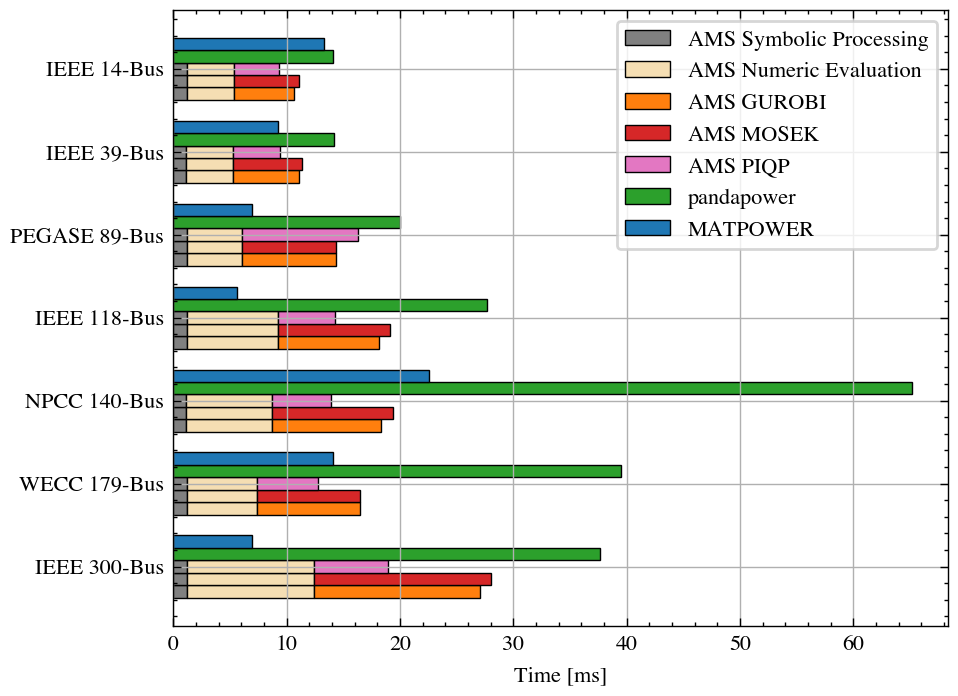

In [8]:
plt.style.use('default')
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False

# Select the first 7 rows
time_plot = time_df.iloc[:7][::-1]

# Calculate the total time for sorting
time_plot['total_time'] = time_plot[['ams_parse'] +
                                    num_cols + ['GUROBI', 'MOSEK', 'PIQP']].sum(axis=1)

# Sort by total time in descending order
# time_plot = time_plot.sort_values(by='total_time', ascending=False)
case_names = time_plot.index.tolist()

# Plotting
figsc, axsc = plt.subplots(1, 1, dpi=200, figsize=(5, 4))

x_index = np.arange(len(time_plot.index))
height = 0.15

edgecolor = 'black'
edgewidth = 0.5

def add_bars_and_arrows(ax, x_pos, heights, color, label, height, left=None):
    bars = ax.barh(x_pos, heights, color=color, label=label,
                   edgecolor=edgecolor, linewidth=edgewidth,
                   height=height, left=left)

left = time_plot[num_cols + ['ams_parse']].sum(axis=1)

# AMS Symbolic Processing
add_bars_and_arrows(axsc, x_index - 2*height,
                    heights=time_plot['ams_parse'],
                    color='grey', label='AMS Symbolic Processing',
                    height=height, left=None)
# AMS Numeric Evaluation
add_bars_and_arrows(axsc, x_index - 2*height,
                    heights=time_plot[num_cols].sum(axis=1),
                    color='wheat', label='AMS Numeric Evaluation',
                    height=height, left=time_plot['ams_parse'])

add_bars_and_arrows(axsc, x_index - height,
                    heights=time_plot['ams_parse'],
                    color='grey', label=None,
                    height=height, left=None)
add_bars_and_arrows(axsc, x_index - height,
                    heights=time_plot[num_cols].sum(axis=1),
                    color='wheat', label=None,
                    height=height, left=time_plot['ams_parse'])
add_bars_and_arrows(axsc, x_index,
                    heights=time_plot['ams_parse'],
                    color='grey', label=None,
                    height=height, left=None)
add_bars_and_arrows(axsc, x_index,
                    heights=time_plot[num_cols].sum(axis=1),
                    color='wheat', label=None,
                    height=height, left=time_plot['ams_parse'])

# AMS GUROBI
add_bars_and_arrows(axsc, x_index - 2*height,
                    heights=time_plot['GUROBI'],
                    color='tab:orange', label='AMS GUROBI',
                    height=height, left=time_plot[num_cols + ['ams_parse']].sum(axis=1))
# AMS MOSEK
add_bars_and_arrows(axsc, x_index - height,
                    heights=time_plot['MOSEK'],
                    color='tab:red', label='AMS MOSEK',
                    height=height, left=time_plot[num_cols + ['ams_parse']].sum(axis=1))
# AMS PIQP
add_bars_and_arrows(axsc, x_index,
                    heights=time_plot['PIQP'],
                    color='tab:pink', label='AMS PIQP',
                    height=height, left=time_plot[num_cols + ['ams_parse']].sum(axis=1))
# pandpower
add_bars_and_arrows(axsc, x_index + height,
                    heights=time_plot['pandapower'],
                    color='tab:green', label='pandapower',
                    height=height, left=None)
# MATPOWER
add_bars_and_arrows(axsc, x_index + 2*height,
                    heights=time_plot['matpower'],
                    color='tab:blue', label='MATPOWER',
                    height=height, left=None)

axsc.legend(loc='upper right', ncols=1, frameon=True)
axsc.set_yticks(x_index)
axsc.set_yticklabels(case_names, rotation=0, ha='right')
axsc.set_xlabel('Time [ms]')
axsc.grid()

figsc.savefig('./fig_dcopf_time_small.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


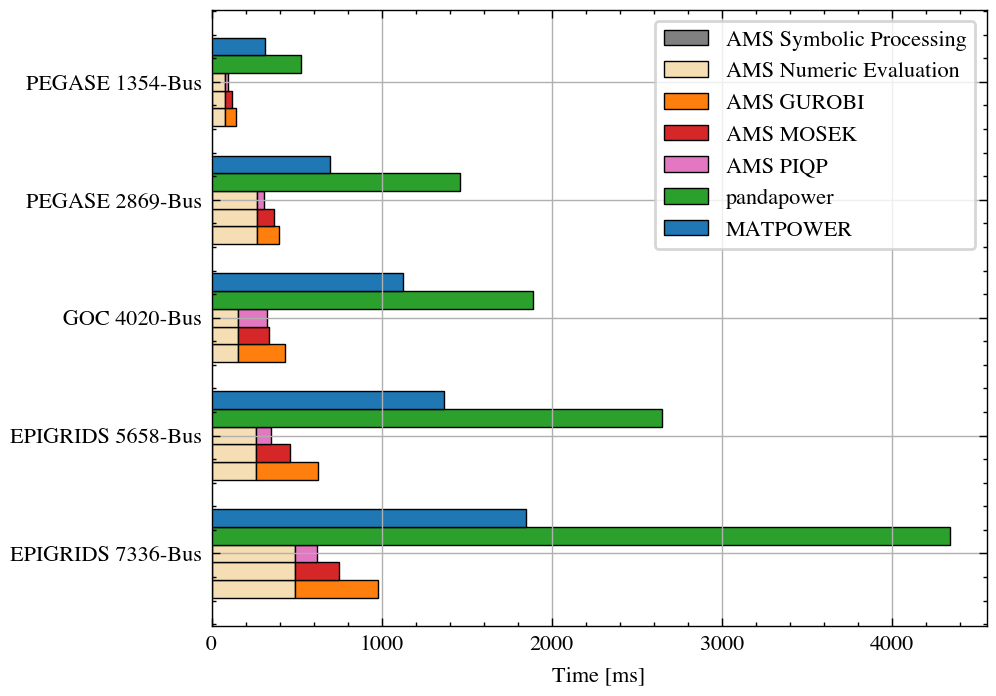

In [9]:
plt.style.use('default')
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False

time_plot = time_df.iloc[7:][::-1]

# Calculate the total time for sorting
time_plot['total_time'] = time_plot[['ams_parse'] +
                                    num_cols + ['GUROBI', 'MOSEK', 'PIQP']].sum(axis=1)

# Sort by total time in descending order
# time_plot = time_plot.sort_values(by='total_time', ascending=False)
case_names = time_plot.index.tolist()

# Plotting
figlc, axlc = plt.subplots(1, 1, dpi=200, figsize=(5, 4))

x_index = np.arange(len(time_plot.index))
height = 0.15

edgecolor = 'black'
edgewidth = 0.5

def add_bars_and_arrows(ax, x_pos, heights, color, label, height, left=None):
    bars = ax.barh(x_pos, heights, color=color, label=label,
                   edgecolor=edgecolor, linewidth=edgewidth,
                   height=height, left=left)

left = time_plot[num_cols + ['ams_parse']].sum(axis=1)

# AMS Symbolic Processing
add_bars_and_arrows(axlc, x_index - 2*height,
                    heights=time_plot['ams_parse'],
                    color='grey', label='AMS Symbolic Processing',
                    height=height, left=None)
# AMS Numeric Evaluation
add_bars_and_arrows(axlc, x_index - 2*height,
                    heights=time_plot[num_cols].sum(axis=1),
                    color='wheat', label='AMS Numeric Evaluation',
                    height=height, left=time_plot['ams_parse'])
add_bars_and_arrows(axlc, x_index - height,
                    heights=time_plot['ams_parse'],
                    color='grey', label=None,
                    height=height, left=None)
add_bars_and_arrows(axlc, x_index - height,
                    heights=time_plot[num_cols].sum(axis=1),
                    color='wheat', label=None,
                    height=height, left=time_plot['ams_parse'])
add_bars_and_arrows(axlc, x_index,
                    heights=time_plot['ams_parse'],
                    color='grey', label=None,
                    height=height, left=None)
add_bars_and_arrows(axlc, x_index,
                    heights=time_plot[num_cols].sum(axis=1),
                    color='wheat', label=None,
                    height=height, left=time_plot['ams_parse'])

# AMS GUROBI
add_bars_and_arrows(axlc, x_index - 2*height,
                    heights=time_plot['GUROBI'],
                    color='tab:orange', label='AMS GUROBI',
                    height=height, left=time_plot[num_cols + ['ams_parse']].sum(axis=1))
# AMS MOSEK
add_bars_and_arrows(axlc, x_index - height,
                    heights=time_plot['MOSEK'],
                    color='tab:red', label='AMS MOSEK',
                    height=height, left=time_plot[num_cols + ['ams_parse']].sum(axis=1))
# AMS PIQP
add_bars_and_arrows(axlc, x_index,
                    heights=time_plot['PIQP'],
                    color='tab:pink', label='AMS PIQP',
                    height=height, left=time_plot[num_cols + ['ams_parse']].sum(axis=1))
# pandpower
add_bars_and_arrows(axlc, x_index + height,
                    heights=time_plot['pandapower'],
                    color='tab:green', label='pandapower',
                    height=height, left=None)
# MATPOWER
add_bars_and_arrows(axlc, x_index + 2*height,
                    heights=time_plot['matpower'],
                    color='tab:blue', label='MATPOWER',
                    height=height, left=None)

axlc.legend(loc='upper right', ncols=1, frameon=True)

axlc.set_yticks(x_index)
axlc.set_yticklabels(case_names, rotation=0, ha='right')
axlc.set_xlabel('Time [ms]')
axlc.grid()

figlc.savefig('./fig_dcopf_time_large.eps', bbox_inches='tight')

## Repeat OPF

In [10]:
time_rdcopf = pd.read_csv('../results/results_time_repeat.csv', index_col=0)
obj_rdcopf = pd.read_csv('../results/results_obj_repeat.csv', index_col=0)
mpr_res = pd.read_csv('../results/results_matpower_repeat.csv')

timer_df = time_rdcopf.copy()
timer_df.index = ['PJM 5-Bus', 'IEEE 14-Bus', 'IEEE 39-Bus', 'NPCC 140-Bus', 'WECC 179-Bus']
timer_df['matpower'] = mpr_res[mp_cols].mean(axis=1).values

timer_df

,ams_mats,ams_parse,ams_eval,ams_final,ams_postinit,GUROBI,MOSEK,PIQP,pandapower,matpower
PJM 5-Bus,0.60,1.25,2.17,0.10,0.01,47.80,47.12,36.16,403.03,79.93242
IEEE 14-Bus,0.67,1.21,2.14,0.09,0.01,54.92,53.85,41.17,280.80,62.69087
IEEE 39-Bus,0.73,1.15,2.28,0.09,0.01,70.04,67.30,44.99,281.45,71.43741
NPCC 140-Bus,1.49,1.19,4.91,0.10,0.01,197.15,183.22,92.37,1246.63,414.51094
WECC 179-Bus,1.61,1.22,3.43,0.10,0.01,196.25,154.21,96.59,884.50,299.69450


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


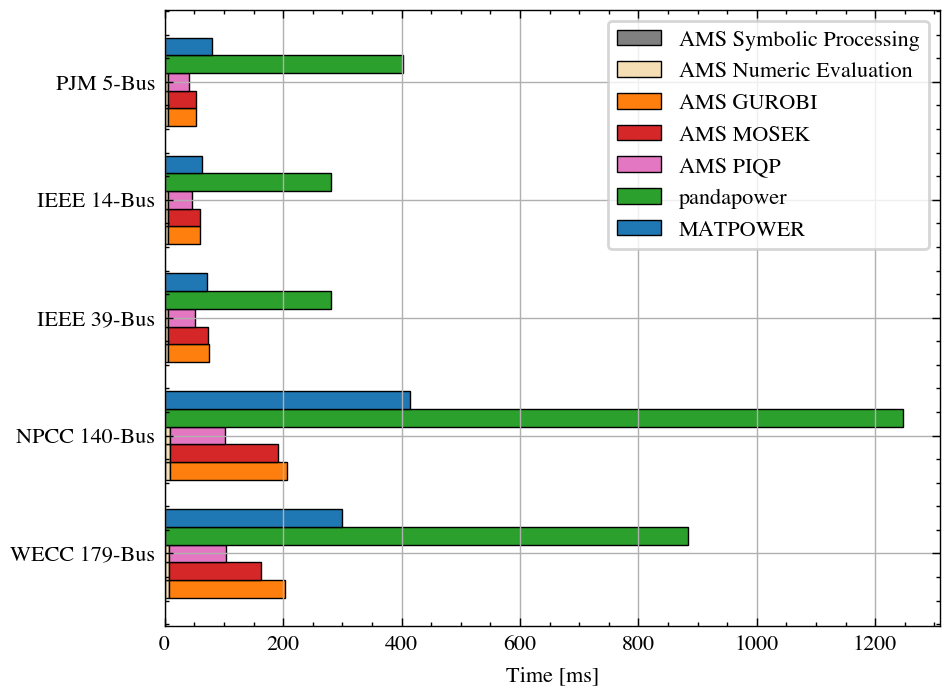

In [11]:
plt.style.use('default')
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False

time_plot = timer_df.iloc[::-1]

# Calculate the total time for sorting
time_plot['total_time'] = time_plot[['ams_parse'] +
                                    num_cols + ['GUROBI', 'MOSEK', 'PIQP']].sum(axis=1)

# Sort by total time in descending order
# time_plot = time_plot.sort_values(by='total_time', ascending=False)
case_names = time_plot.index.tolist()

# Plotting
figr, axr = plt.subplots(1, 1, dpi=200, figsize=(5, 4))

x_index = np.arange(len(time_plot.index))
height = 0.15

edgecolor = 'black'
edgewidth = 0.5

def add_bars_and_arrows(ax, x_pos, heights, color, label, height, left=None):
    bars = ax.barh(x_pos, heights, color=color, label=label,
                   edgecolor=edgecolor, linewidth=edgewidth,
                   height=height, left=left)

left = time_plot[num_cols + ['ams_parse']].sum(axis=1)

# AMS Symbolic Processing
add_bars_and_arrows(axr, x_index - 2*height,
                    heights=time_plot['ams_parse'],
                    color='grey', label='AMS Symbolic Processing',
                    height=height, left=None)
# AMS Numeric Evaluation
add_bars_and_arrows(axr, x_index - 2*height,
                    heights=time_plot[num_cols].sum(axis=1),
                    color='wheat', label='AMS Numeric Evaluation',
                    height=height, left=time_plot['ams_parse'])
add_bars_and_arrows(axr, x_index - height,
                    heights=time_plot['ams_parse'],
                    color='grey', label=None,
                    height=height, left=None)
add_bars_and_arrows(axr, x_index - height,
                    heights=time_plot[num_cols].sum(axis=1),
                    color='wheat', label=None,
                    height=height, left=time_plot['ams_parse'])
add_bars_and_arrows(axr, x_index,
                    heights=time_plot['ams_parse'],
                    color='grey', label=None,
                    height=height, left=None)
add_bars_and_arrows(axr, x_index,
                    heights=time_plot[num_cols].sum(axis=1),
                    color='wheat', label=None,
                    height=height, left=time_plot['ams_parse'])

# AMS GUROBI
add_bars_and_arrows(axr, x_index - 2*height,
                    heights=time_plot['GUROBI'],
                    color='tab:orange', label='AMS GUROBI',
                    height=height, left=time_plot[num_cols + ['ams_parse']].sum(axis=1))
# AMS MOSEK
add_bars_and_arrows(axr, x_index - height,
                    heights=time_plot['MOSEK'],
                    color='tab:red', label='AMS MOSEK',
                    height=height, left=time_plot[num_cols + ['ams_parse']].sum(axis=1))
# AMS PIQP
add_bars_and_arrows(axr, x_index,
                    heights=time_plot['PIQP'],
                    color='tab:pink', label='AMS PIQP',
                    height=height, left=time_plot[num_cols + ['ams_parse']].sum(axis=1))
# pandpower
add_bars_and_arrows(axr, x_index + height,
                    heights=time_plot['pandapower'],
                    color='tab:green', label='pandapower',
                    height=height, left=None)
# MATPOWER
add_bars_and_arrows(axr, x_index + 2*height,
                    heights=time_plot['matpower'],
                    color='tab:blue', label='MATPOWER',
                    height=height, left=None)

axr.legend(loc='upper right', ncols=1, frameon=True)

axr.set_yticks(x_index)
axr.set_yticklabels(case_names, rotation=0, ha='right')
axr.set_xlabel('Time [ms]')
axr.grid()

figr.savefig('fig_dcopf_repeat.eps', bbox_inches='tight')

## EDUC

In [12]:
time_ed = pd.read_csv('../results/results_ed.csv', index_col=0)
time_uc = pd.read_csv('../results/results_uc.csv', index_col=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


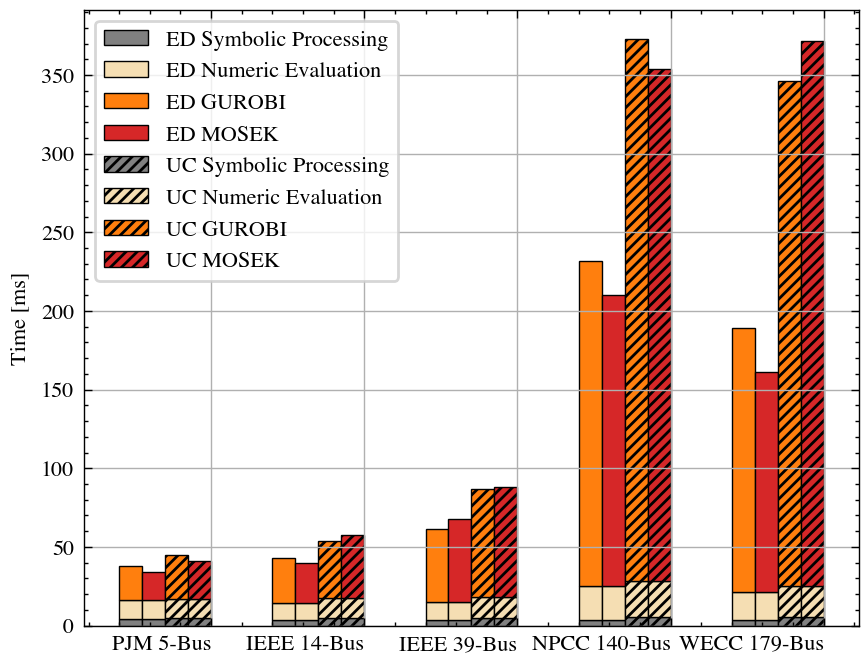

In [13]:
plt.style.use('default')
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False

figeduc, axeduc = plt.subplots(1, 1, dpi=200, figsize=(5, 4))

time_ed_plot = time_ed
time_uc_plot = time_uc

width = 0.15
x_index = np.arange(len(time_ed_plot.index))

edgecolor = 'black'
edgewidth = 0.5

axeduc.bar(x_index-width, time_ed_plot['ams_parse'],
           color='grey', label='ED Symbolic Processing',
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width,)
axeduc.bar(x_index-width, time_ed_plot[num_cols].sum(axis=1),
           color='wheat', label='ED Numeric Evaluation',
           bottom=time_ed_plot['ams_parse'],
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width,)
axeduc.bar(x_index-width, time_ed_plot['GUROBI'],
           color='tab:orange', label='ED GUROBI',
           bottom=time_ed_plot[num_cols + ['ams_parse']].sum(axis=1),
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width,)

axeduc.bar(x_index, time_ed_plot['ams_parse'],
           color='grey', label=None,
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width,)
axeduc.bar(x_index, time_ed_plot[num_cols].sum(axis=1),
           color='wheat', label=None,
           bottom=time_ed_plot['ams_parse'],
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width,)
axeduc.bar(x_index, time_ed_plot['MOSEK'],
           color='tab:red', label='ED MOSEK',
           bottom=time_ed_plot[num_cols + ['ams_parse']].sum(axis=1),
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width,)

hatch = '//////'
axeduc.bar(x_index+width, time_uc_plot['ams_parse'],
           color='grey', label='UC Symbolic Processing',
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width, hatch=hatch)
axeduc.bar(x_index+width, time_uc_plot[num_cols].sum(axis=1),
           color='wheat', label='UC Numeric Evaluation',
           bottom=time_uc_plot['ams_parse'],
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width, hatch=hatch)
axeduc.bar(x_index+width, time_uc_plot['GUROBI'],
           color='tab:orange', label='UC GUROBI',
           bottom=time_uc_plot[num_cols + ['ams_parse']].sum(axis=1),
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width, hatch=hatch)

axeduc.bar(x_index+2*width, time_uc_plot['ams_parse'],
           color='grey', label=None,
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width, hatch=hatch)
axeduc.bar(x_index+2*width, time_uc_plot[num_cols].sum(axis=1),
           color='wheat', label=None,
           bottom=time_uc_plot['ams_parse'],
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width, hatch=hatch)
axeduc.bar(x_index+2*width, time_uc_plot['MOSEK'],
           color='tab:red', label='UC MOSEK',
           bottom=time_uc_plot[num_cols + ['ams_parse']].sum(axis=1),
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width, hatch=hatch)

_ = axeduc.set_xticks(x_index + 2.5*width)
educ_cases = ['PJM 5-Bus', 'IEEE 14-Bus',
              'IEEE 39-Bus', 'NPCC 140-Bus',
              'WECC 179-Bus',]

_ = axeduc.set_xticklabels(educ_cases, rotation=0, ha='right')
_ = axeduc.set_ylabel('Time [ms]')
axeduc.grid()

axeduc.legend(loc='upper left', ncols=1,
              frameon=True)

figeduc.savefig("fig_educ_time.eps", format='eps')

## EDUC at Large Scale

In [14]:
# this file is in unit 's' rather than 'ms'
time_educ = pd.read_csv('../results/results_educ_large.csv', index_col=0)
time_educ.set_index('time', inplace=True)
time_educ[['UC', 'ED']] *= 1000
time_educ

,UC,ED
time,,
ams_mats,236.6,226.5
ams_parse,6.3,4.2
ams_eval,38916.4,48008.4
ams_final,0.1,0.1
ams_postinit,0.8,0.1
ams_solver,45786.9,39715.6


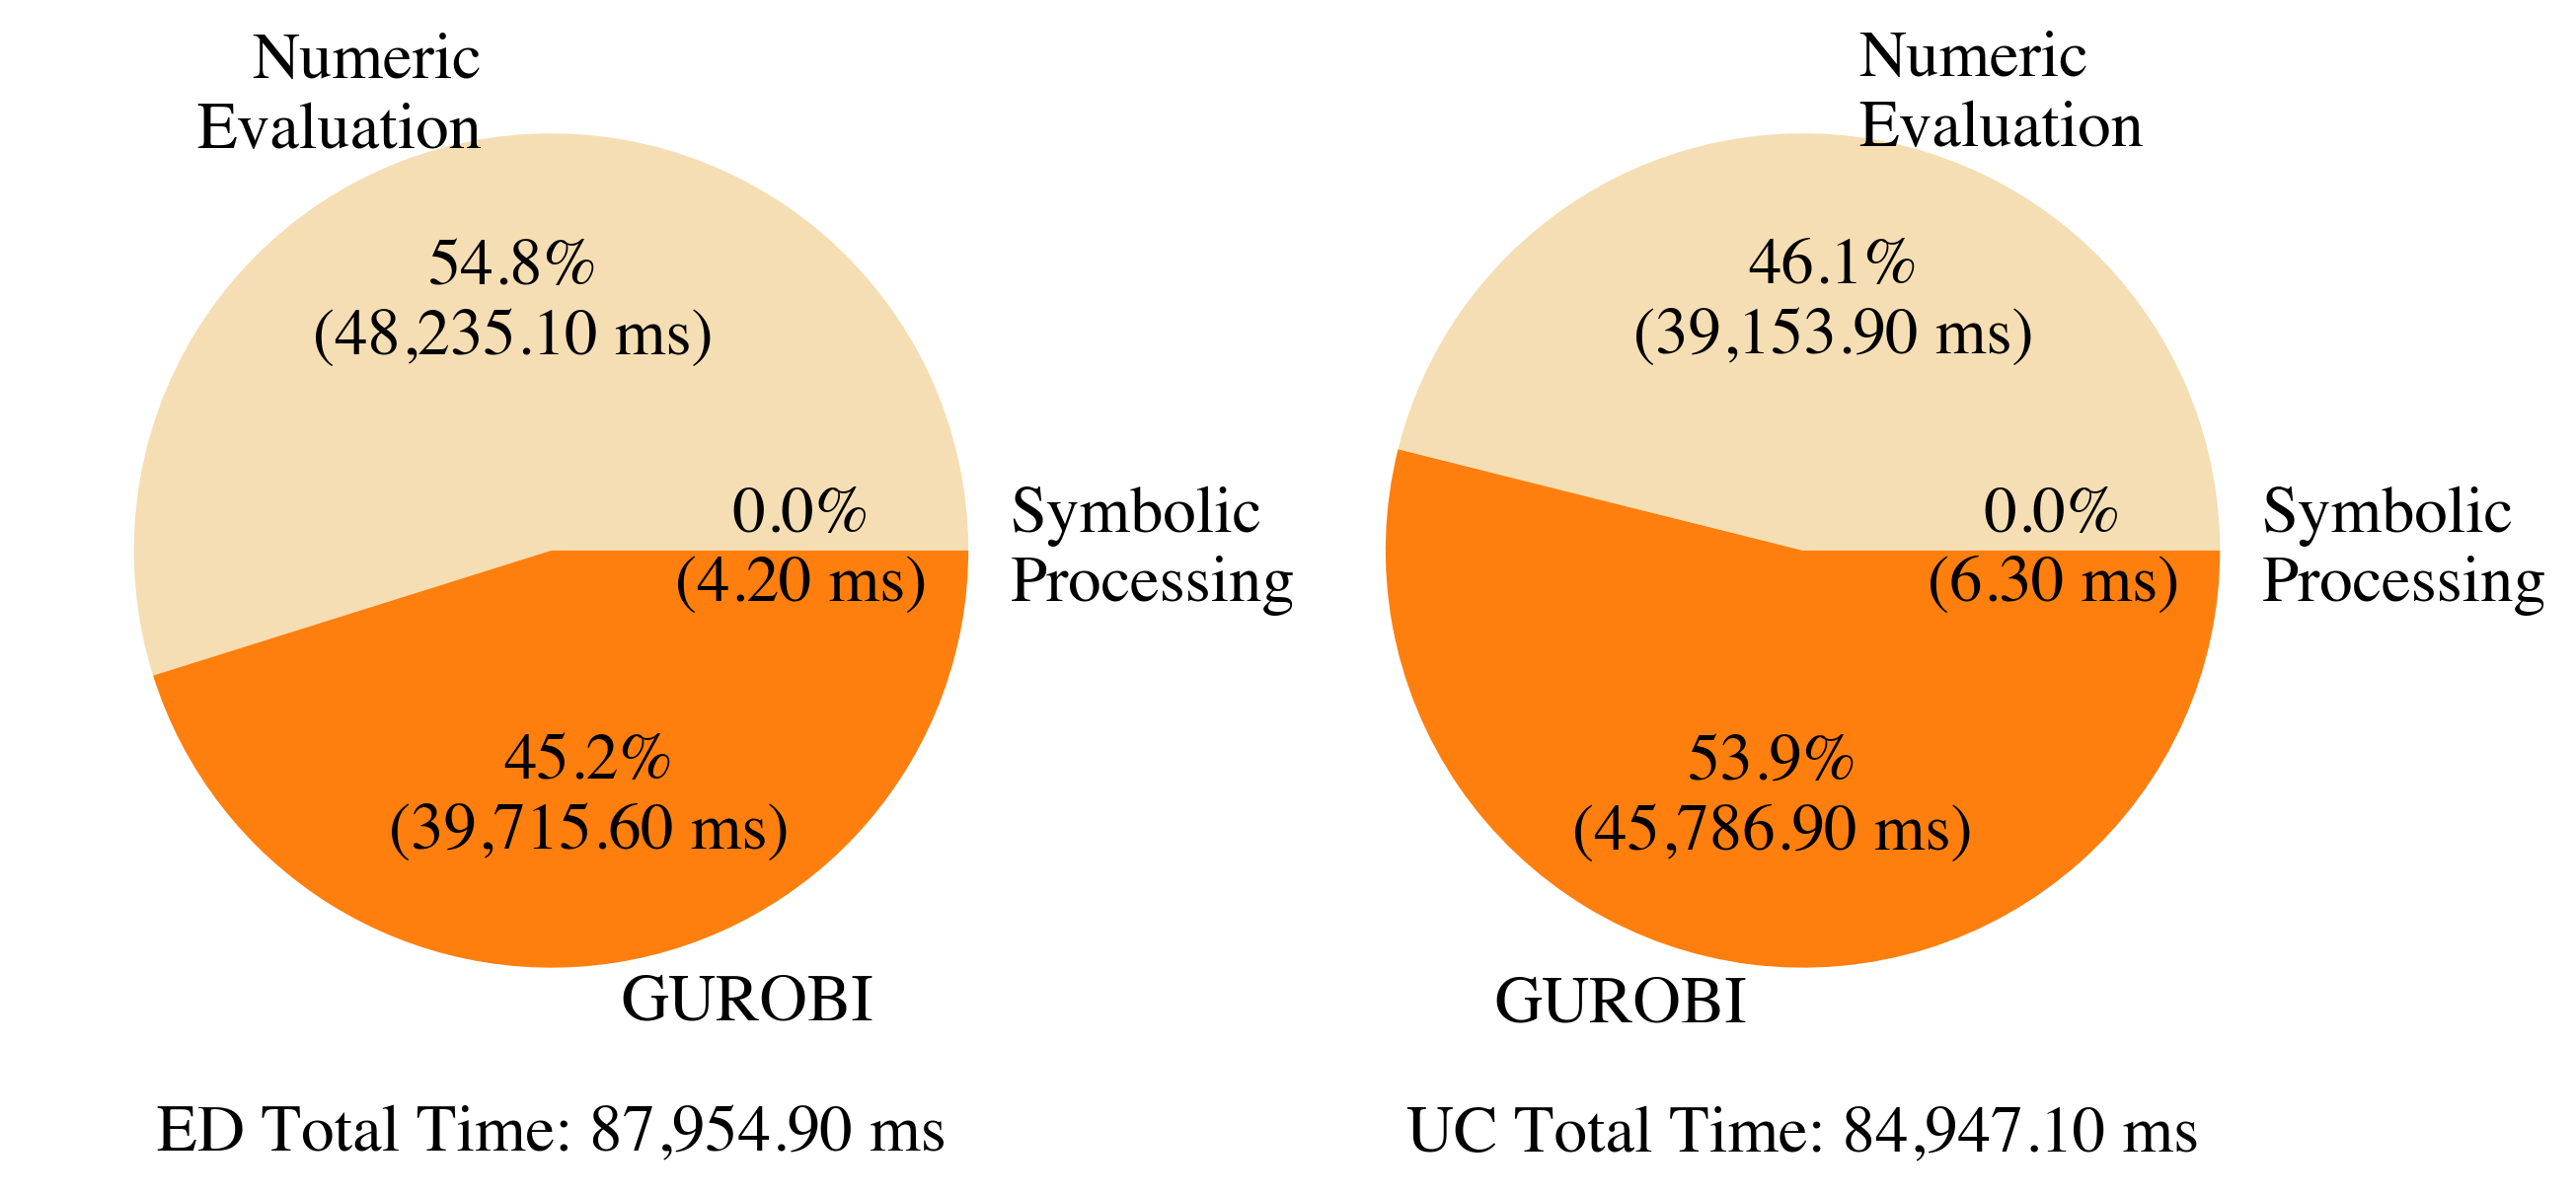

In [15]:
# Define the categories
categories = {
    'Symbolic\nProcessing': ['ams_parse'],
    'Numeric\nEvaluation': ['ams_mats', 'ams_eval', 'ams_final', 'ams_postinit'],
    'GUROBI': ['ams_solver']
}

# Function to aggregate data based on categories
def aggregate_data(df, categories, column):
    aggregated_data = {}
    for category, items in categories.items():
        aggregated_data[category] = df.loc[items, column].sum()
    return aggregated_data

# Aggregate data for ED and UC
ed_data = aggregate_data(time_educ, categories, 'ED')
uc_data = aggregate_data(time_educ, categories, 'UC')

# Custom function to format the labels
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = pct * total / 100.0
        return f'{pct:.1f}%\n({val:,.2f} ms)'
    return my_format

# Create pie charts
plt.style.use('default')
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False

figpi, axpi = plt.subplots(1, 2, figsize=(5, 3))

colors_pi = ['grey', 'wheat', 'tab:orange']

# ED Pie Chart
axpi[0].pie(ed_data.values(), labels=ed_data.keys(), autopct=autopct_format(ed_data.values()), colors=colors_pi)
axpi[0].set_xlabel(f'ED Total Time: {time_educ["ED"].sum():,.2f} ms')

# UC Pie Chart
axpi[1].pie(uc_data.values(), labels=uc_data.keys(), autopct=autopct_format(uc_data.values()), colors=colors_pi)
axpi[1].set_xlabel(f'UC Total Time: {time_educ["UC"].sum():,.2f} ms')

figpi.savefig("fig_educ_pie.eps", format='eps')